> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction and dataset description
This data set mainly aims to identify why 30% of patients miss their scheduled appointments.  The data set can be found here: https://www.kaggle.com/joniarroba/noshowappointments?select=KaggleV2-May-2016.csv

The dataset includes the following columns:
-PatientID and AppointmentID (Both ID columns were removed during the investigation as they have no significance to our results).
-Gender (Male or Female)
-Scheduled Day and AppointmentDay (Was not used in this research, although can be used in the future to find out if people are more likely to mis their appointments during Winter months.
-Age of Patient - this was used in several investigations.
-Neighborhood - Also was not used however, it can be useful in future research identified below.
-Scholarship, Hypertension, Handcap (unused in this research).
-SMS_received - was used to identify the impact of sending SMS reminders on reducing missed appointments.
-No-show - This is a key column to a large part of this research.

# Questions for analysis:

# Q1-What is the relation between age and missing appointments?

# Q2-What is the impact of SMS reminders on Missed appointments?

# Q3- What is the relation between gender and missing appointments?

# Q4-What is the relation between age groups and Diabetes?

# Q5-What is the relation between age groups and Alcoholism?

# 2d Multiple-variable plot - Frequency distribution of appointments for each age group, per gender

# Potential future research: Are people more likely to miss their appointments during Winter? - this can be done by investigating seasons using the "AppointmentDay" column.

# Potential future research: Are people more likely to miss their appointments when the difference between AppointmentDay and ScheduledDay is very large?

# Potential future research:  What are the most neighborhoods likely to have missed appointments?

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#seaborn is not essential but makes visualisation looks better
import seaborn as sns
%matplotlib inline

In [4]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 4.0MB/s eta 0:00:01   65% |████████████████████▉           | 6.8MB 22.8MB/s eta 0:00:01    75% |████████████████████████▏       | 7.9MB 23.1MB/s eta 0:00:01    85% |███████████████████████████▌    | 9.0MB 21.4MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.8MB/s eta 0:00:01   16% |█████▍                          | 2.2MB 23.2MB/s eta 0:00:01    32% |██████████▍                     | 4.4MB 22.1MB/s eta 0:00:01    78% |█████████████████████████       | 10.5MB 21.0MB/s eta 0:00:01    85% |███████████████████████████▌    | 11.5MB 20.0MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninstalled pandas-0.23.3


<a id='wrangling'></a>
## Data Wrangling

In [97]:
# Loading data
# define a function for load data to be called at any line of the code.
def load_data():
    df = pd.read_csv('KaggleV2.csv')
#Rename column Noshow
    df = df.rename(columns={'No-show':'Noshow'})

In [98]:
load_data()

In [99]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
#number of rows and columns
df.shape


(110527, 14)

In [7]:
#Check for duplicates
df.duplicated().sum()

0

### no duplicates found

In [8]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
Noshow            0
dtype: int64

### no null values found

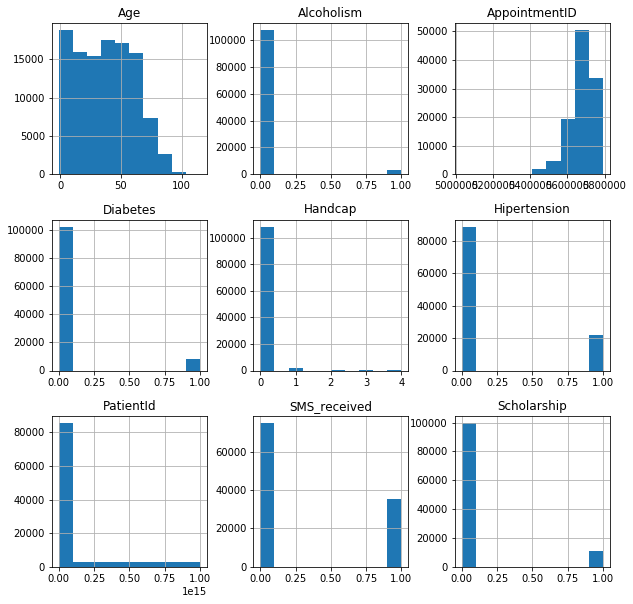

In [9]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize=(10, 10));

In [10]:
#Check datatypes
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
Noshow             object
dtype: object

In [11]:
#Find unique values 
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
Noshow                 2
dtype: int64

In [9]:
#Descriptive statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
#Print a concise summary of a DataFrame, including the index dtype and columns, non-null values and memory usage.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
Noshow            110527 non-null object
dtypes: int64(6), object(5)
memory usage: 9.3+ MB


### Data Cleaning
 

In [3]:
#Drop non-required columns
df.drop(['PatientId', 'AppointmentID', 'Scholarship', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood', 'Hipertension','Handcap'], axis=1, inplace=True)
df.head()

,Gender,Age,Diabetes,Alcoholism,SMS_received,Noshow
0,F,62,0,0,0,No
1,M,56,0,0,0,No
2,F,62,0,0,0,No
3,F,8,0,0,0,No
4,F,56,1,0,0,No


In [9]:
#Descriptive statistics
df.describe()

,Age,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Relation between age and missing appointments)

In [10]:
df.Noshow.value_counts()

No     88208
Yes    22319
Name: Noshow, dtype: int64

In [12]:

df.query('Noshow == "No"')['Age'].median(), df.query('Noshow == "Yes"')['Age'].median(), 

(38.0, 33.0)

In [13]:
df.query('Noshow == "No"')['Age'].mean(), df.query('Noshow == "Yes"')['Age'].mean(), 

(37.790064393252315, 34.317666562121957)

It was found that Average and median age of no shows is remarkably lower.

In [13]:
df.query('Noshow == "No"')['Age'].mean(), df.query('Noshow == "Yes"')['Age'].mean(), 

(37.790064393252315, 34.31766656212196)

In [11]:
df.groupby('Noshow')['Age'].mean()

Noshow
No     37.790064
Yes    34.317667
Name: Age, dtype: float64

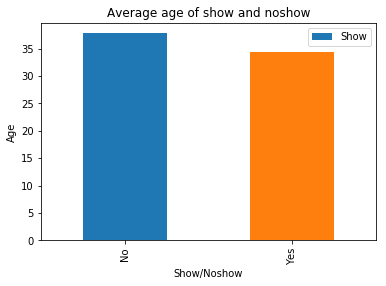

In [21]:
df.groupby('Noshow')['Age'].mean().plot(kind='bar')
plt.title('Average age of show and noshow')
plt.xlabel('Show/Noshow')
plt.ylabel('Age')
plt.legend(['Show'], loc='upper right');

# Findings of Research Question 1 - It was found that the average age of no shows is notably lower.   This means that people of younger age are more likely to miss appointments. 

# Limitation:  However, we sould also check if this is only because more appointments were booked by younger people.

### Research Question 2 (Relation between SMS reminders and missed appointments)

In [33]:
df.groupby('Noshow')['SMS_received'].value_counts()

Noshow  SMS_received
No      0               62510
        1               25698
Yes     0               12535
        1                9784
Name: SMS_received, dtype: int64

In [27]:
df.groupby('Noshow').sum().SMS_received

Noshow
No     25698
Yes     9784
Name: SMS_received, dtype: int64

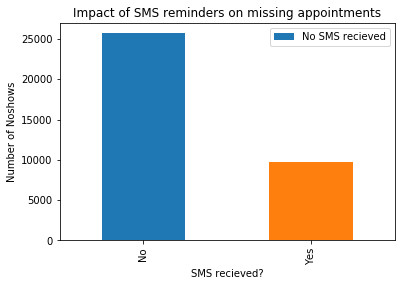

In [24]:
df.groupby('Noshow').sum().SMS_received.plot(kind='bar')
plt.title('Impact of SMS reminders on missing appointments')
plt.xlabel('SMS recieved?')
plt.ylabel('Number of Noshows')
plt.legend(['No SMS recieved'], loc='upper right');

# Findings of Research Question 2 (Relation between SMS reminders and missed appointments) As shown in the above Plot, the majority of people who attended (No show = No) have recieved SMS messages.  This means that sending SMS reminders to patients significantly reduces missed appointments.

### Research Question 3  (Relation between Gender and missed appointments)

In [26]:
df2=df[df['Noshow'] == "Yes"]
df2.groupby('Noshow')['Gender'].value_counts()

Noshow  Gender
Yes     F         14594
        M          7725
Name: Gender, dtype: int64

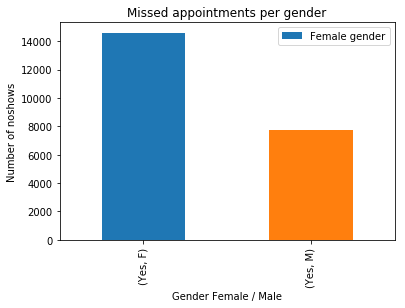

In [27]:
df2.groupby('Noshow')['Gender'].value_counts().plot(kind='bar')
plt.title('Missed appointments per gender')
plt.xlabel('Gender Female / Male')
plt.ylabel('Number of noshows')
plt.legend(['Female gender'], loc='upper right');

# Although Female noshows are much higher in Female gender, it could be contributed to a higher number of female appoitnments.

In [66]:
df2.Gender.value_counts()

F    14594
M     7725
Name: Gender, dtype: int64

# By investigating the dataset, it was found that the number of female appointments are much higher than male appoitnments.  Therefore, a better indicator to use for measuring gender correlation with missed appointments is: the ratio between Noshow = yes and Noshow = No between both Males and females.

In [67]:
df3 = df[df['Noshow']== "Yes"]
df3.groupby('Noshow')['Gender'].value_counts()

f_yes = df[(df['Gender'] == 'F') & (df['Noshow']== "Yes")]['Gender'].count()
f_no = df[(df['Gender'] == 'F') & (df['Noshow']== "No")]['Gender'].count()
f_ratio = f_yes/f_no
print(f_ratio)
m_yes = df[(df['Gender'] == 'M') & (df['Noshow']== "Yes")]['Gender'].count()
m_no = df[(df['Gender'] == 'M') & (df['Noshow']== "No")]['Gender'].count()
m_ratio = m_yes/m_no
print(m_ratio)
fm_ratio = f_ratio/m_ratio
print(fm_ratio)

0.2549348426090906
0.24949938634455138
1.02178544943206


# By investigating the ratio between Shows and Noshows, it was found that difference between male and female genders is negligible.

# Findings of Research Question 3 (Relation between Gender and missed appointments) As shown in the above investigation, there is no correlation between gender and missed appointments.  This is an example of causation VS correlation.   There is a higher number of female Noshows, however, this is only due to the fact that female appointments are much higher in number.

### Research Question 4  (What is the relation between age groups and Diabetes?)

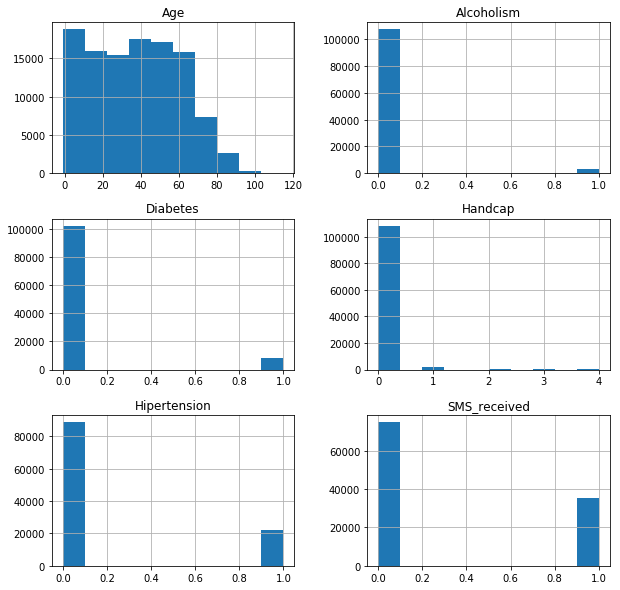

In [29]:
# Histogram - test
df.hist(figsize=(10, 10));

In [71]:
#Average ages for people with diabetes = 61
df.groupby('Diabetes').mean().Age

Diabetes
0    35.208610
1    61.372529
Name: Age, dtype: float64

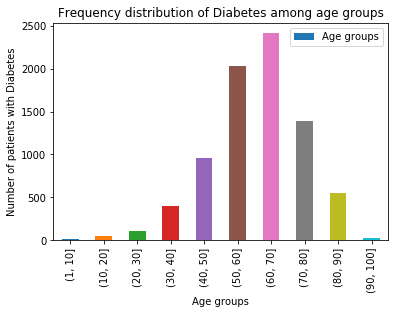

In [36]:
#frequency distribution of Diabetes among age groups.
df5 = df[df['Diabetes']== 1]
ranges = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
df6 = df5.groupby(pd.cut(df5['Age'], ranges))['Diabetes'].count()
df6.plot(kind = 'bar')
plt.title('Frequency distribution of Diabetes among age groups')
plt.xlabel('Age groups')
plt.ylabel('Number of patients with Diabetes')
plt.legend(['Age groups'], loc='upper right');

# Findings of Q4: As in the plot above, patients within age groups 50-60 and 60-70 are the most likely to have diabetes.

### Research Question 5  (What is the relation between age groups and Alcoholism?)

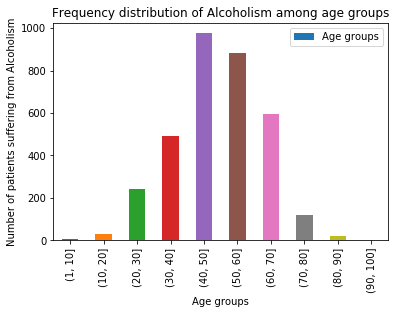

In [37]:
#frequency distribution of Alcoholism among age groups.
df7 = df[df['Alcoholism']== 1]
ranges = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
df8 = df7.groupby(pd.cut(df7['Age'], ranges))['Alcoholism'].count()
df8.plot(kind = 'bar')
plt.title('Frequency distribution of Alcoholism among age groups')
plt.xlabel('Age groups')
plt.ylabel('Number of patients suffering from Alcoholism')
plt.legend(['Age groups'], loc='upper right');

# Findings of Q5: As in the plot above, patients within age groups 40-50 and 50-60 are the most likely to suffer from Alcoholism.

### 2d Multiple-variable plot - Frequency distribution of appointments for each age group, per gender

In [54]:
#counts of appointments per gender (female counts)
df.Gender[F].value_counts()

F    71840
Name: Gender, dtype: int64

In [55]:
#counts of appointments per gender (male counts)
df.Gender[M].value_counts()

M    38687
Name: Gender, dtype: int64

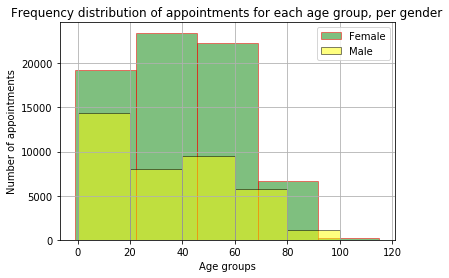

In [72]:
#Plotting the frequency distribution of appointments for each age group, per gender
#A multi-variable plot
F = df.Gender == 'F'
M = df.Gender == 'M'
df.Age[F].hist(alpha=0.5, edgecolor="red", color="green", bins=5, label='Female')
df.Age[M].hist(alpha=0.5, edgecolor="black", color="yellow", bins=5, label='Male')
plt.title('Frequency distribution of appointments for each age group, per gender')
plt.xlabel('Age groups')
plt.ylabel('Number of appointments')
plt.legend()

# Finding of 2d plot: For males more people in the 0-20 age group are booking appointments than people in the 20-40 age group.  For females, less people in the 0-20 age group are booking appointments than people in the 20-40 age group.

<a id='conclusions'></a>
# Conclusions and limitations
## The folowing questions were investigated in this report:
### Q1-What is the relation between age and missing appointments?
### Q2-What is the impact of SMS reminders on Missed appointments?
### Q3- What is the relation between gender and missing appointments?
### Q4-What is the relation between age groups and Diabetes?
### Q5-What is the relation between age groups and Alcoholism?
### 2d Multiple-variable plot - Frequency distribution of appointments for each age group, per gender
Potential future research: Are people more likely to miss their appointments during Winter? - this can be done by investigating seasons using the "AppointmentDay" column.
Potential future research: Are people more likely to miss their appointments when the difference between AppointmentDay and ScheduledDay is very large?
Potential future research: What are the most neighborhoods likely to have missed appointments?
-----------------------------------------------------------------------------------------------------------------------------------

Findings:
---------------
Findings of Research Question 1 - It was found that the average age of no shows is notably lower. This means that people of younger age are more likely to miss appointments.
Limitation: However, we sould also check if this is only because more appointments were booked by younger people.

Findings of Research Question 2 (Relation between SMS reminders and missed appointments) As shown in the above Plot, the majority of people who attended (No show = No) have recieved SMS messages. This means that sending SMS reminders to patients significantly reduces missed appointments.

Findings of Research Question 3
By investigating the dataset, it was found that the number of female appointments are much higher than male appoitnments.  
It was thought that although Female noshows are much higher in Female gender, it could be contributed to a higher number of female appoitnments. By investigating the ratio between Shows and Noshows, it was found that difference between male and female genders is negligible. It was found that in there is no correlation between gender and missed appointments.  This is an example of causation VS correlation.   There is a higher number of female Noshows, however, this is only due to the fact that female appointments are much higher in number.

Findings of Research Question 4
It was found that patients within age groups 50-60 and 60-70 are the most likely to have diabetes.

Findings of Q5: As in the plot above, patients within age groups 40-50 and 50-60 are the most likely to suffer from Alcoholism.

Finding of 2d plot: For males more people in the 0-20 age group are booking appointments than people in the 20-40 age group.  For females, less people in the 0-20 age group are booking appointments than people in the 20-40 age group.


## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [100]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_Medical_Dataset.ipynb'])

0